* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [3]:
import pandas as pd
import numpy as np


### Combining Datsets
Crawler contains several duplicates

In [4]:
# naming file and setting the path
last_day = "12_26_"
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_12_26_.csv'

In [5]:
# reed the covid dataset
df1 = pd.read_csv(file_path)

In [6]:
# naming file and setting the path
file_path2 = "dataset/seoul_covid_12_26_ copy.csv"
file_path2

'dataset/seoul_covid_12_26_ copy.csv'

In [7]:
# reed the covid dataset
df2 = pd.read_csv(file_path)

In [33]:
df = pd.concat([df1, df2], axis=0)

In [9]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)

# peek at dataset
print(df.shape)
df.head(15)

(34860, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17430,56828,12.26.,기타,-,동부구치소 관련,NaN
0,17430,56828,12.26.,기타,-,동부구치소 관련,NaN
1,17429,56827,12.26.,기타,-,동부구치소 관련,NaN
1,17429,56827,12.26.,기타,-,동부구치소 관련,NaN
2,17428,56826,12.26.,기타,-,동부구치소 관련,NaN
2,17428,56826,12.26.,기타,-,동부구치소 관련,NaN
3,17427,56806,12.26.,기타,-,동부구치소 관련,NaN
3,17427,56806,12.26.,기타,-,동부구치소 관련,NaN
4,17426,56817,12.26.,기타,-,동부구치소 관련,NaN
4,17426,56817,12.26.,기타,-,동부구치소 관련,NaN


In [36]:
df = df.drop_duplicates()
print(df.shape)
df.head()

(17230, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,17430,56828,12.26.,기타,-,동부구치소 관련,NaN
1,17429,56827,12.26.,기타,-,동부구치소 관련,NaN
2,17428,56826,12.26.,기타,-,동부구치소 관련,NaN
3,17427,56806,12.26.,기타,-,동부구치소 관련,NaN
4,17426,56817,12.26.,기타,-,동부구치소 관련,NaN


In [37]:
df.to_csv(file_path, index=False)

### EDA

In [39]:
df_etc = df[df['접촉력'].str.match("기타")]
print(df_etc.shape)
df_etc.sample(15)

(4963, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
9092,8338,32990,11.27.,성북구,-,기타 확진자 접촉,퇴원
11879,5551,24632,10.11.,관악구,-,기타 확진자 접촉,퇴원
737,16693,55123,12.25.,중랑구,-,기타 확진자 접촉,NaN
3346,14157,48285,12.18.,관악구,-,기타 확진자 접촐,NaN
6064,11366,40666,12.10.,관악구,-,기타 확진자 접촉,NaN
299,17131,56321,12.26.,성동구,-,기타 확진자 접촉,NaN
9454,7976,31954,11.25.,노원구,-,기타 확진자 접촉,NaN
12675,4755,22441,9.15.,동작구,-,기타 확진자 접촉,퇴원
11349,6081,26705,11.01.,도봉구,-,기타 확진자 접촉,NaN
12903,4527,21811,9.10.,동작구,-,기타 확진자 접촉,퇴원


In [40]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
church_infected_proportion = "{0:.0%}".format(round(len(df_church)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion}")
df_church.sample(5)

number of patients incurred from church: 8%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
15159,2271,15878,8.18.,은평구,-,성북구 사랑제일교회 관련,퇴원
7616,9814,36473,12.04.,마포구,-,마포구 홍대새교회 관련,NaN
15602,1828,15002,8.14.,성북구,-,성북구 사랑제일교회 관련,퇴원
15216,2214,15969,8.18.,타시도,-,성북구 사랑제일교회 관련,퇴원
13568,3862,17244,8.22.,노원구,-,성북구 사랑제일교회 관련,퇴원


In [41]:
# number of patients involved in church other than 사랑제일교회
df_church_2 = df[(df["접촉력"].str.contains("교회") == True) & (df["접촉력"].str.contains("사랑제일교회") == False)]
church_infected_proportion2 = "{0:.0%}".format(round(len(df_church_2)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion2}")
df_church_2.head(5)

number of patients incurred from church: 5%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
166,17264,56166,12.26.,송파구,-,강서구 교회 관련,NaN
167,17263,56167,12.26.,송파구,-,강서구 교회 관련,NaN
168,17262,56164,12.26.,송파구,-,강서구 교회 관련,NaN
201,17229,56860,12.26.,금천구,-,금천구 소재 교회 관련,NaN
206,17224,56855,12.26.,금천구,-,금천구 소재 교회 관련,NaN


In [42]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

12.24.    552
12.19.    472
12.25.    467
12.16.    423
12.17.    397
         ... 
3.3.        1
08.25.      1
2.6.        1
5.31.       1
4.30.       1
Name: 확진일, Length: 311, dtype: int64

In [43]:
df["확진일"].head(4)

0    12.26.
1    12.26.
2    12.26.
3    12.26.
Name: 확진일, dtype: object

In [44]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-12-26
1   2020-12-26
2   2020-12-26
3   2020-12-26
4   2020-12-26
Name: 확진일자, dtype: datetime64[ns]

In [45]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [46]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [47]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,17430,56828,12.26.,기타,-,동부구치소 관련,NaN,2020-12-26,12,52,12-26
1,17429,56827,12.26.,기타,-,동부구치소 관련,NaN,2020-12-26,12,52,12-26
2,17428,56826,12.26.,기타,-,동부구치소 관련,NaN,2020-12-26,12,52,12-26


## Visualization

In [48]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [49]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

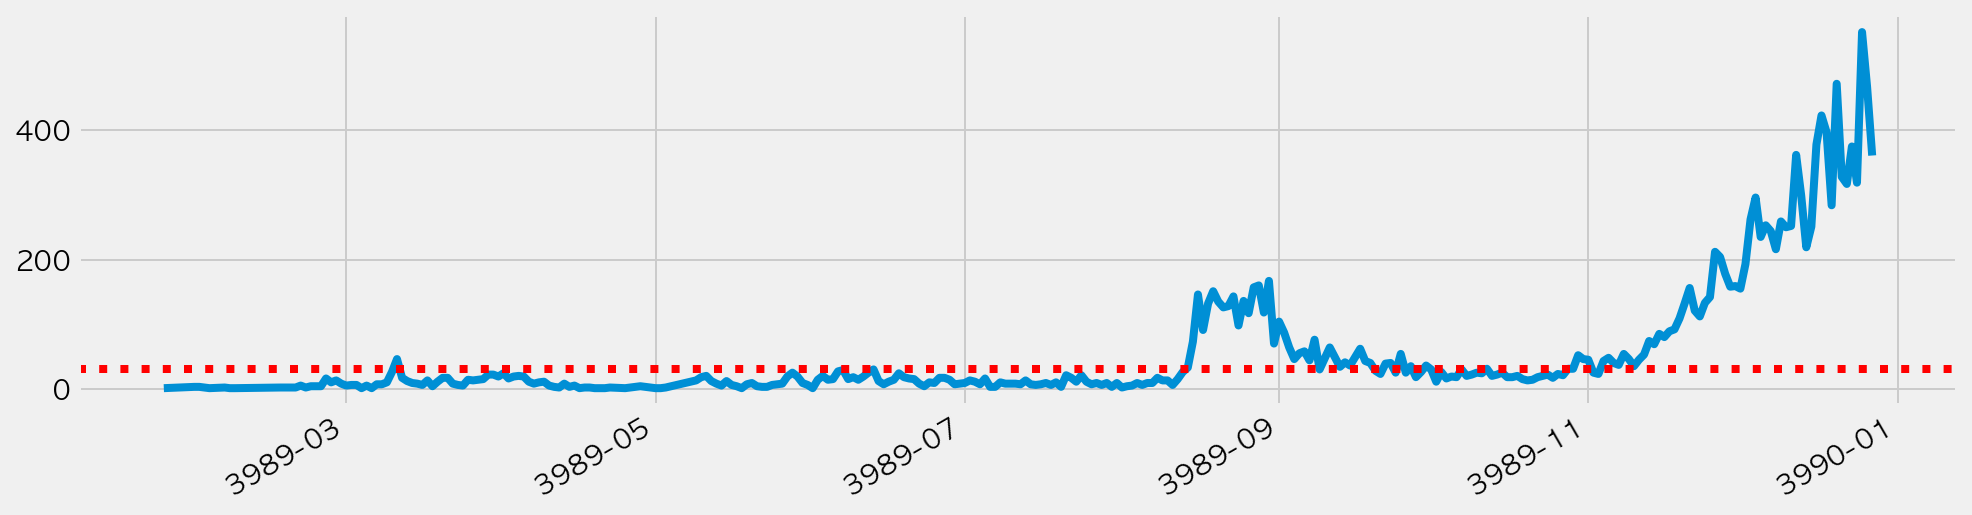

In [50]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [51]:
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,17430,56828,12.26.,기타,-,동부구치소 관련,NaN,2020-12-26,12,52,12-26
1,17429,56827,12.26.,기타,-,동부구치소 관련,NaN,2020-12-26,12,52,12-26
2,17428,56826,12.26.,기타,-,동부구치소 관련,NaN,2020-12-26,12,52,12-26
3,17427,56806,12.26.,기타,-,동부구치소 관련,NaN,2020-12-26,12,52,12-26
4,17426,56817,12.26.,기타,-,동부구치소 관련,NaN,2020-12-26,12,52,12-26
5,17425,56379,12.26.,중랑구,-,기타 확진자 접촉,NaN,2020-12-26,12,52,12-26
6,17424,56254,12.26.,강동구,-,기타 확진자 접촉,NaN,2020-12-26,12,52,12-26
7,17423,56843,12.26.,타시도,-,감염경로 조사중,NaN,2020-12-26,12,52,12-26
8,17422,56842,12.26.,타시도,-,감염경로 조사중,NaN,2020-12-26,12,52,12-26
9,17421,56245,12.26.,강서구,-,기타 확진자 접촉,NaN,2020-12-26,12,52,12-26


In [52]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    309.000000
mean      55.760518
std       92.717002
min        1.000000
25%        8.000000
50%       18.000000
75%       47.000000
max      552.000000
Name: 월일, dtype: float64

In [53]:
# get 10 days of recent confirmed cases
day_count[-10:]

12-17    397
12-18    284
12-19    472
12-20    328
12-21    317
12-22    375
12-23    319
12-24    552
12-25    467
12-26    361
Name: 월일, dtype: int64

In [54]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

12-24    552
Name: 월일, dtype: int64

In [55]:
# Covid19 infection classified with patients' contact to the disease
number_of_paths = len(df["접촉력"].unique()) # get unique value for types of contagion route 
print(f"Total number of paths for infection: {number_of_paths}")
df["접촉력"].unique()

Total number of paths for infection: 511


array(['동부구치소 관련', '기타 확진자 접촉', '감염경로 조사중', '영등포구 소재 의료기관',
       '구로구 소재 요양병원 관련', '타시도 확진자 접촉', '송파구 소재 장애인 생활시설 관련',
       '용산구 소재 건설현장 관련', '양천구 소재 요양시설 관련', '강남구 소재 공기업 관련', '강서구 교회 관련',
       '금천구 소재 교회 관련', '해외 유입', '중구 콜센터', '강동구 지인모임 관련', '강남구 개인사저 경비팀',
       '종로구 소재 요양시설', '중구 소재 콜센터(한전SCS) 관련', '타시도 확진다 접촉',
       '마포구 소재 보험회사 관련', '동부구치소', '해외유입', '노원구 병원 관련', '강남구 개인사저 경비팀 관련',
       '동대문구 소재 교회관련', '중구 소재 직장 관련', '강남구 소재 콜센터Ⅱ 관련',
       '중구 소재 직장 관련(농협중앙회)', '동부 구치소 관련', '중구 소재 직장', '성북구 종교시설(장암교회) 관련',
       '중구 콜센터Ⅱ 관련', '강동구 지인모임', '노원구 병원 관련(강북연세병원)', '종로구 소재 파고다타운 관련',
       '-', '기타', '동대문구 지혜병원 관련', '송파구 소재 병원관련(12월)', '중구 소재 직장(농협중앙회)',
       '영등포구 소재 의료기관 관련', '서울동부구치소 관련', '중구 콜센터 Ⅱ 관련', '중랑구 소재 병원 관련',
       '서초구 소재 병원', '용산구 음식점 관련', '중구 소재 시장(남대문시장) 관련', '서초구 사우나Ⅱ 관련',
       '동대문구 소재 교회 관련', '동작구 사우나 관련', '동대문구 지헤병원 관련', '구로구 소재 요양벙원',
       '기타 확진자 접촐', '마포구 홍대세교회 관련', '광진구 소재 병원 관련', '송파구 체육시설 관련',
       '고려대학교 밴드동아리', '마포구 소재 노인복지시설 관련', '성동

In [58]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
search_condition = (df["접촉력"].str.contains("확인") | df["접촉력"].str.contains("조사"))
array_unknown = df.loc[search_condition,"접촉력"].unique()
array_unknown

array(['감염경로 조사중', '감염경로 확인중', '감염경로 조사 중', '확인 중', '확인중'], dtype=object)

In [59]:
# overwrite whatever cell value that contains "확인" as "확인 중"
for item in array_unknown:
    df.loc[df["접촉력"].str.contains(item),"접촉력"] = "확인 중"

# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [60]:
df["접촉력"].value_counts().head(20)

기타 확진자 접촉            4829
확인 중                 3838
타시도 확진자 접촉            776
성북구 사랑제일교회 관련         641
해외 접촉 추정              404
동부구치소                 293
강서구 교회 관련             218
강서구 댄스교습관련 시설         208
종로구 소재 파고다타운 관련       207
동부구치소 관련              195
해외 유입                 183
이태원 클럽 관련             139
8.15서울도심집회            126
리치웨이 관련               119
구로구 소재 요양병원 관련        108
기타                     99
서초구 사우나Ⅱ 관련            82
서초구 사우나 관련             78
동대문구 에이스희망케어센터 관련      71
도봉구 다나병원               68
Name: 접촉력, dtype: int64

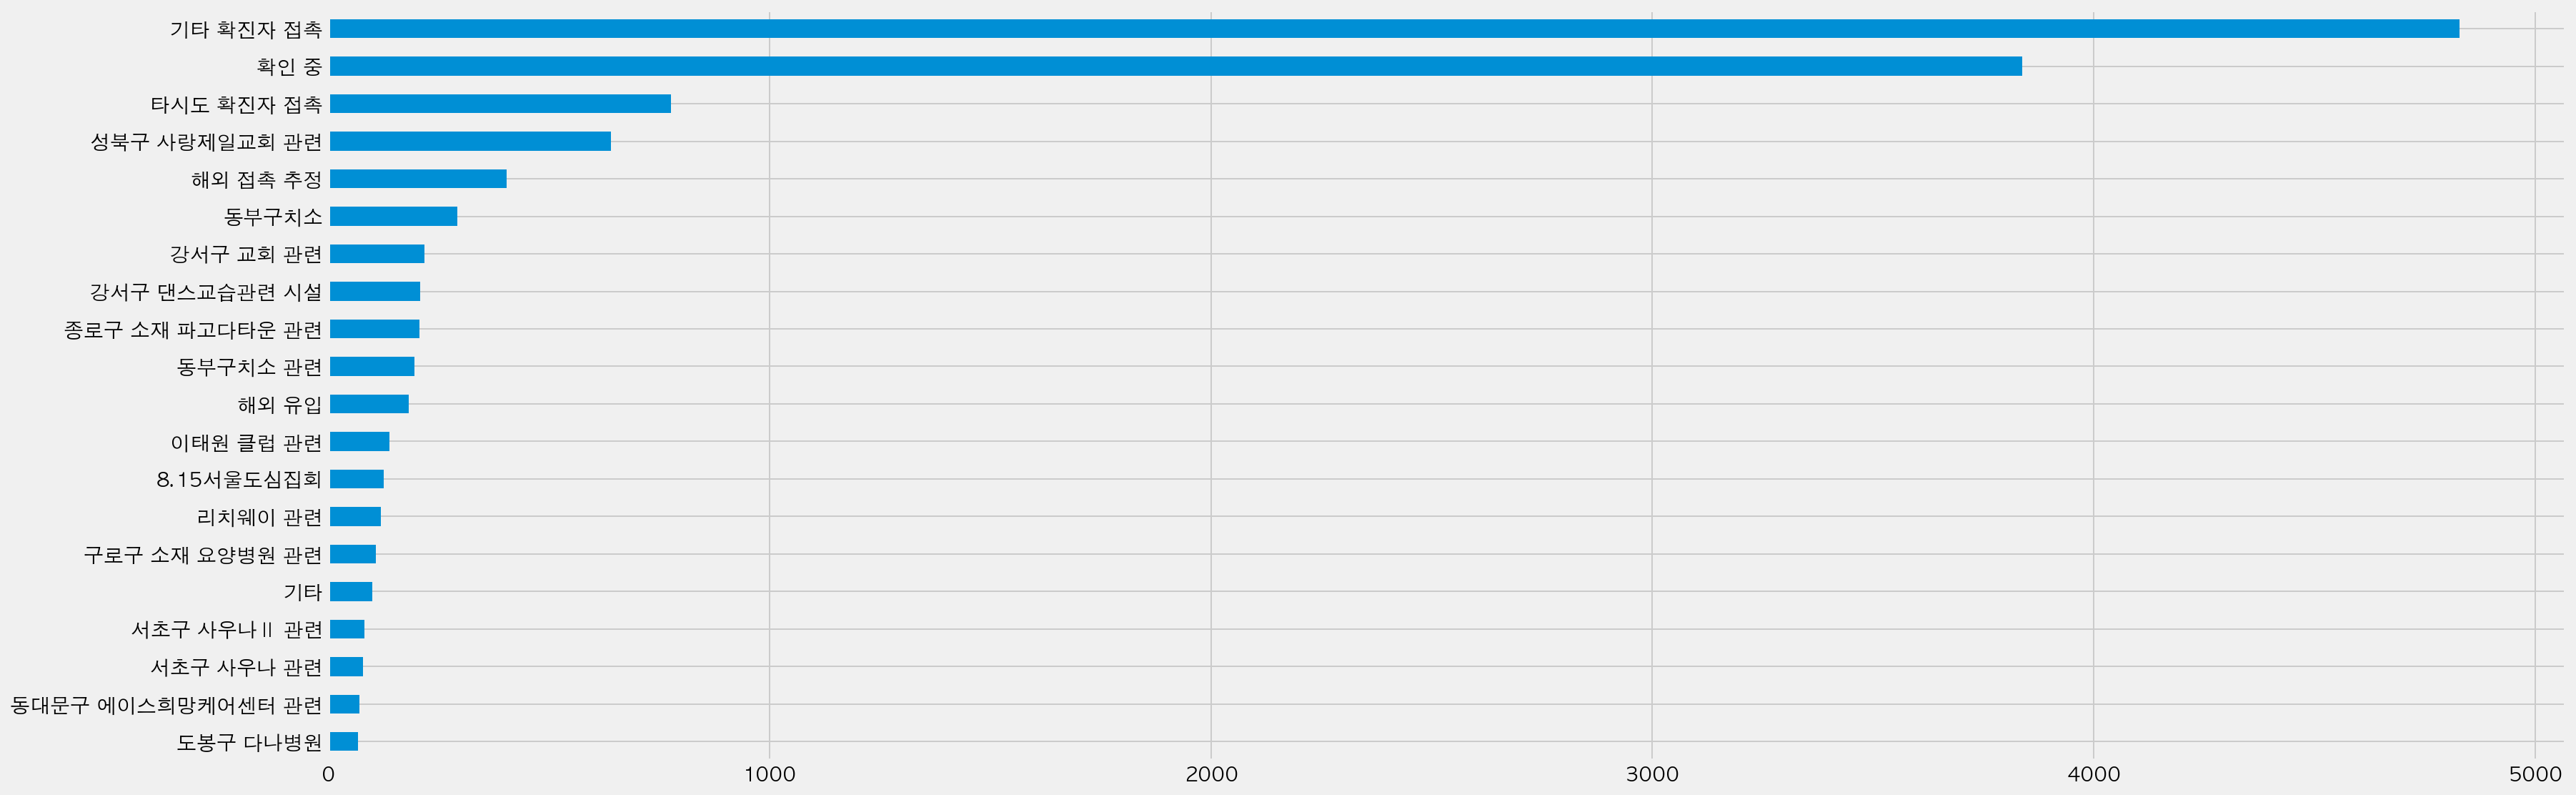

In [61]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [62]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")

In [63]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

기타 확진자 접촉          4829
확인 중               3838
타시도 확진자 접촉          776
성북구 사랑제일교회 관련       641
해외 접촉 추정            404
동부구치소               293
강서구 교회 관련           218
강서구 댄스교습관련 시설       208
종로구 소재 파고다타운 관련     207
동부구치소 관련            195
해외 유입               183
이태원 클럽 관련           139
8.15서울도심집회          126
리치웨이 관련             119
구로구 소재 요양병원 관련      108
Name: 접촉력, dtype: int64

In [64]:
top_count_recent = df.loc[df["확진일자"]>="2020-12-12", "접촉력"].value_counts().head(10)
top_count_recent

기타 확진자 접촉             2232
확인 중                  1683
동부구치소                  293
타시도 확진자 접촉             198
동부구치소 관련               195
강서구 교회 관련              130
구로구 소재 요양병원 관련         108
기타                      99
용산구 소재 건설현장 관련          64
송파구 소재 장애인 생활시설 관련      35
Name: 접촉력, dtype: int64

## 감염경로 불명

In [65]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
7,17423,56843,12.26.,타시도,-,확인 중,NaN,2020-12-26,12,52,12-26
8,17422,56842,12.26.,타시도,-,확인 중,NaN,2020-12-26,12,52,12-26
14,17416,56716,12.26.,강서구,-,확인 중,NaN,2020-12-26,12,52,12-26
16,17414,56269,12.26.,영등포구,-,확인 중,NaN,2020-12-26,12,52,12-26
22,17408,56872,12.26.,강서구,-,확인 중,NaN,2020-12-26,12,52,12-26
...,...,...,...,...,...,...,...,...,...,...,...
17374,56,1768,2.25.,은평구,-,확인 중,퇴원,2020-02-25,2,9,02-25
17388,42,1370,2.25.,송파구,-,확인 중,퇴원,2020-02-25,2,9,02-25
17391,39,924,2.25.,금천구,-,확인 중,퇴원,2020-02-25,2,9,02-25
17392,38,907,2.25.,타시도,-,확인 중,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

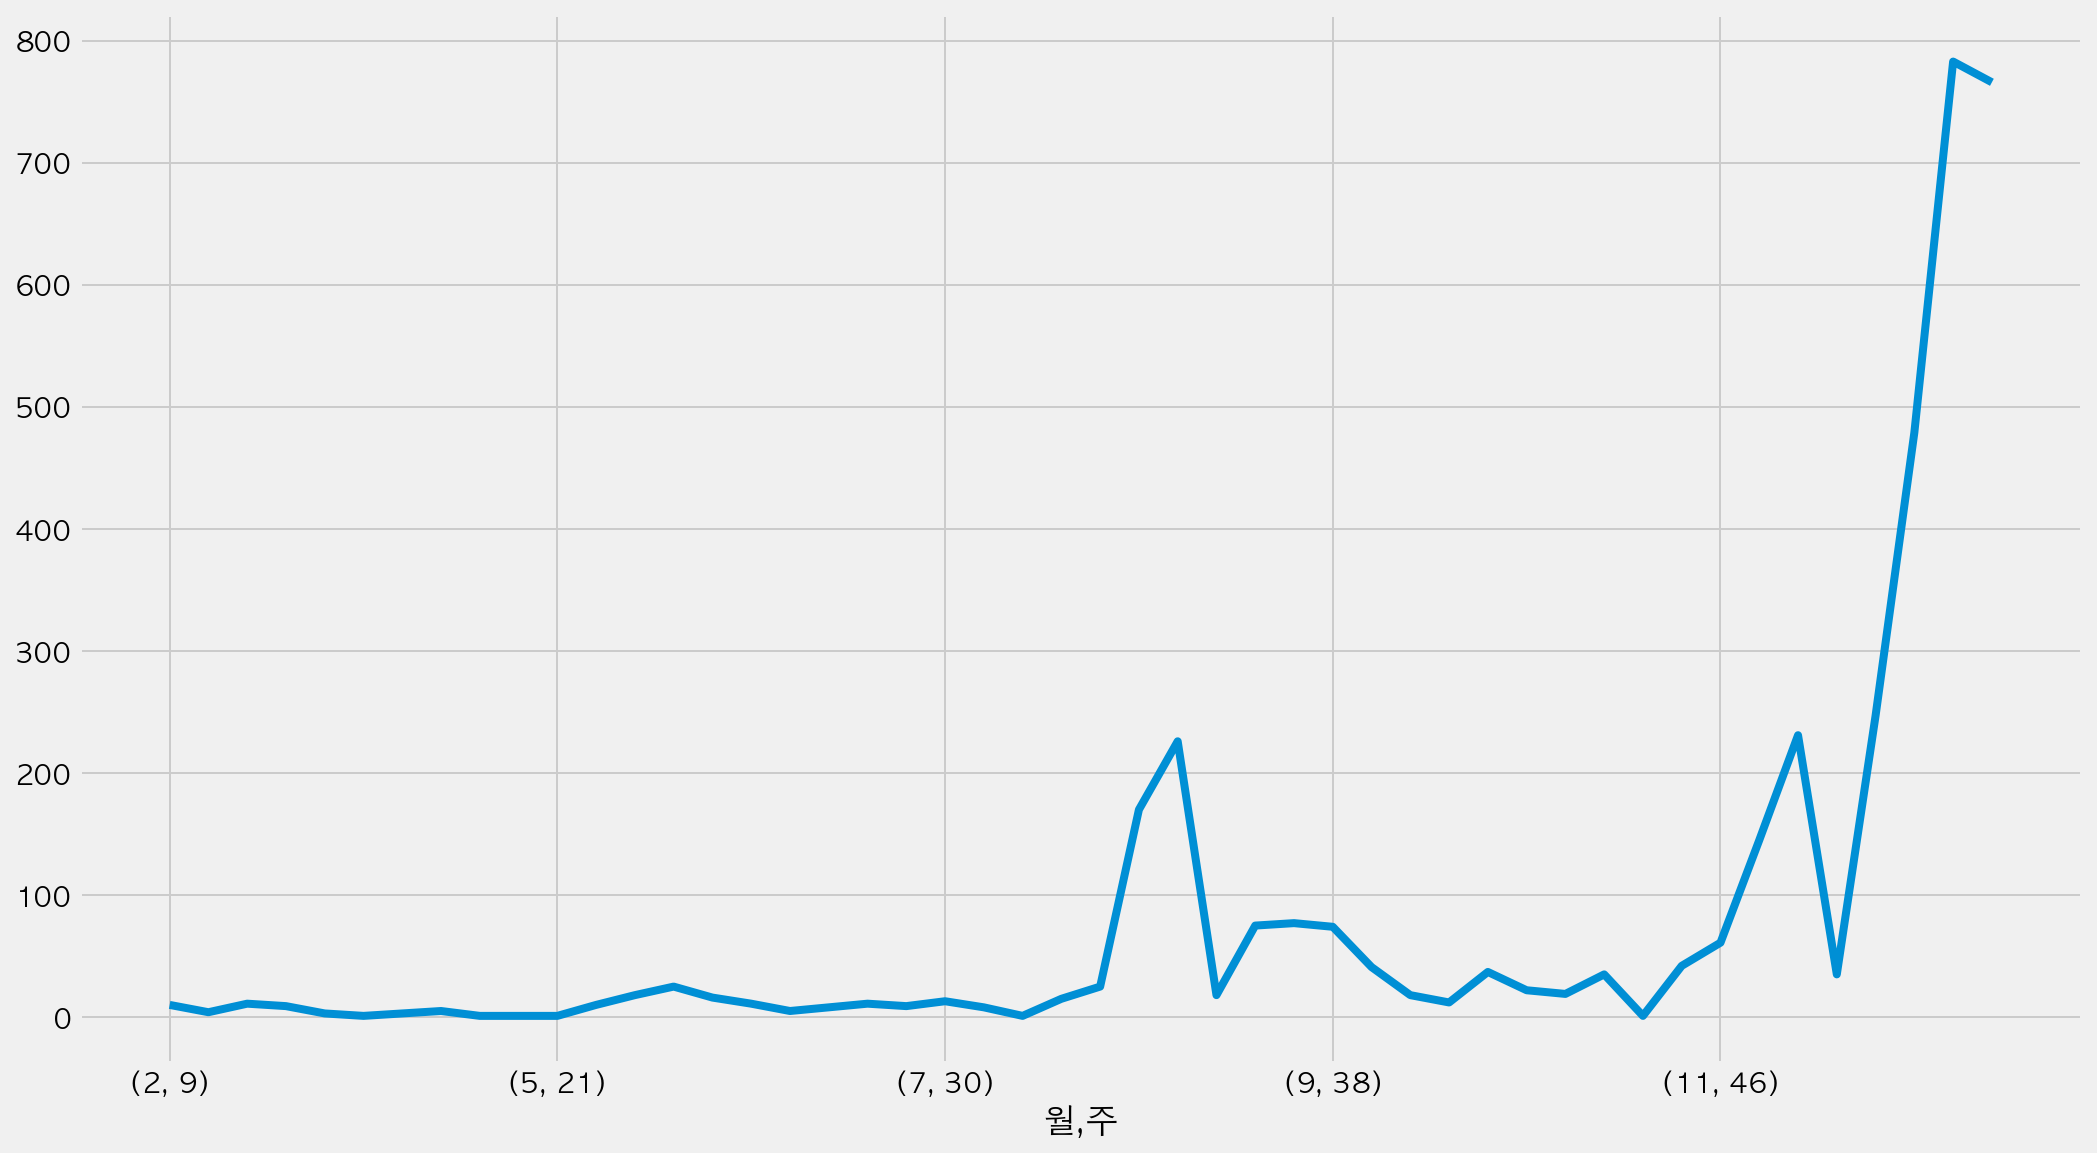

In [66]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [67]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
51,2533
52,2391
50,1857
49,1638
48,1186


In [68]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
51,783
52,766
50,479
49,282
48,231


In [69]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,10
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [70]:
comparison[-4:]

,전체확진자수,불명확진수
49,1638,282
50,1857,479
51,2533,783
52,2391,766


<AxesSubplot:>

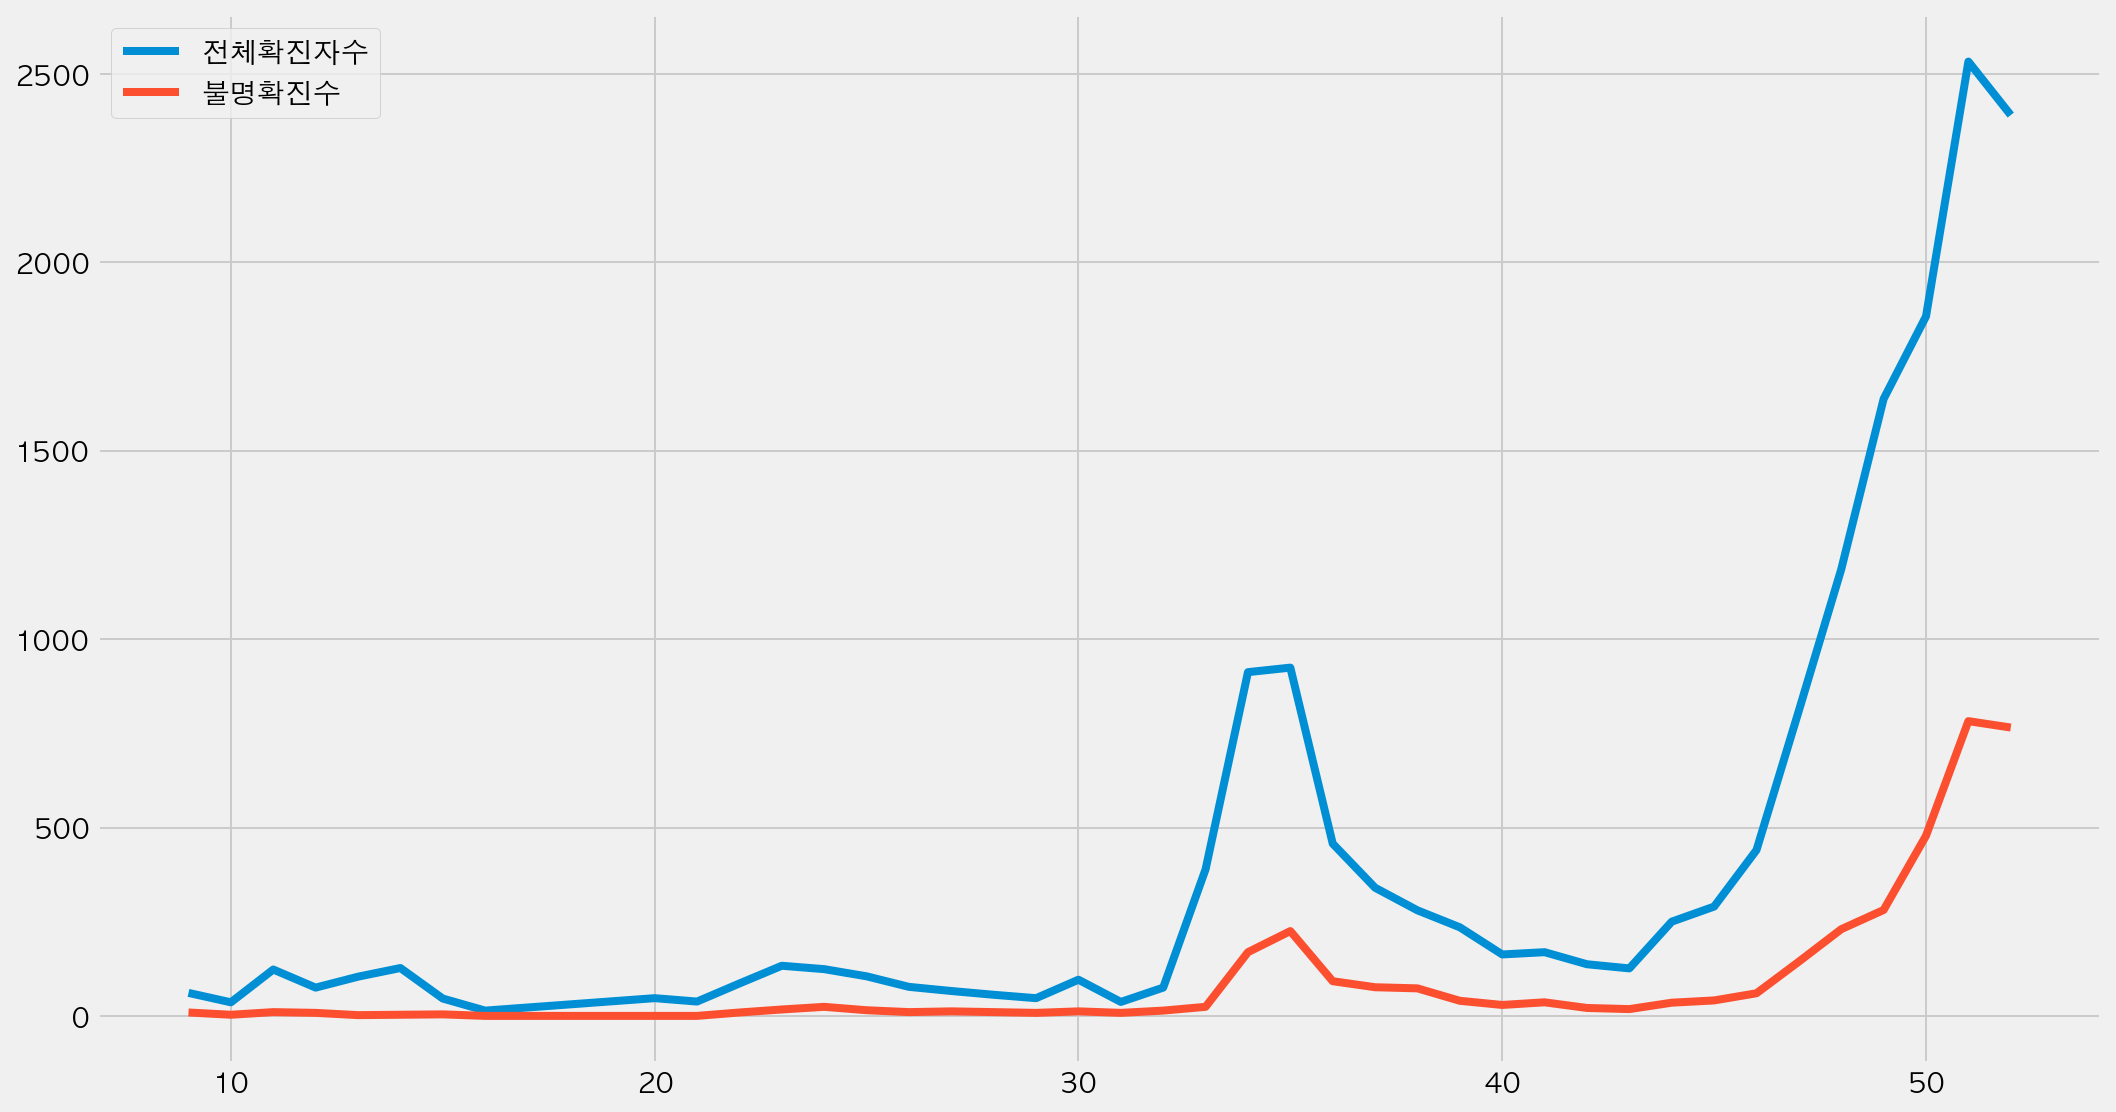

In [71]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [72]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [73]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     16.129032
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    13.402062
31    23.684211
32    19.736842
33     6.410256
34    18.619934
35    24.432432
36    20.305677
37    22.580645
38    26.334520
39    17.372881
40    18.292683
41    21.764706
42    15.942029
43    14.960630
44    14.342629
45    14.432990
46    13.832200
47    17.879162
48    19.477234
49    17.216117
50    25.794292
51    30.911962
52    32.036805
dtype: float64

In [74]:
percentages[-4:]

49    17.216117
50    25.794292
51    30.911962
52    32.036805
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
18.619934282584886
24.43243243243243
20.305676855895197
22.58064516129032
26.334519572953734
18.29268292682927
21.764705882352942
19.477234401349072
25.794291868605278
30.91196210027635
32.03680468423254


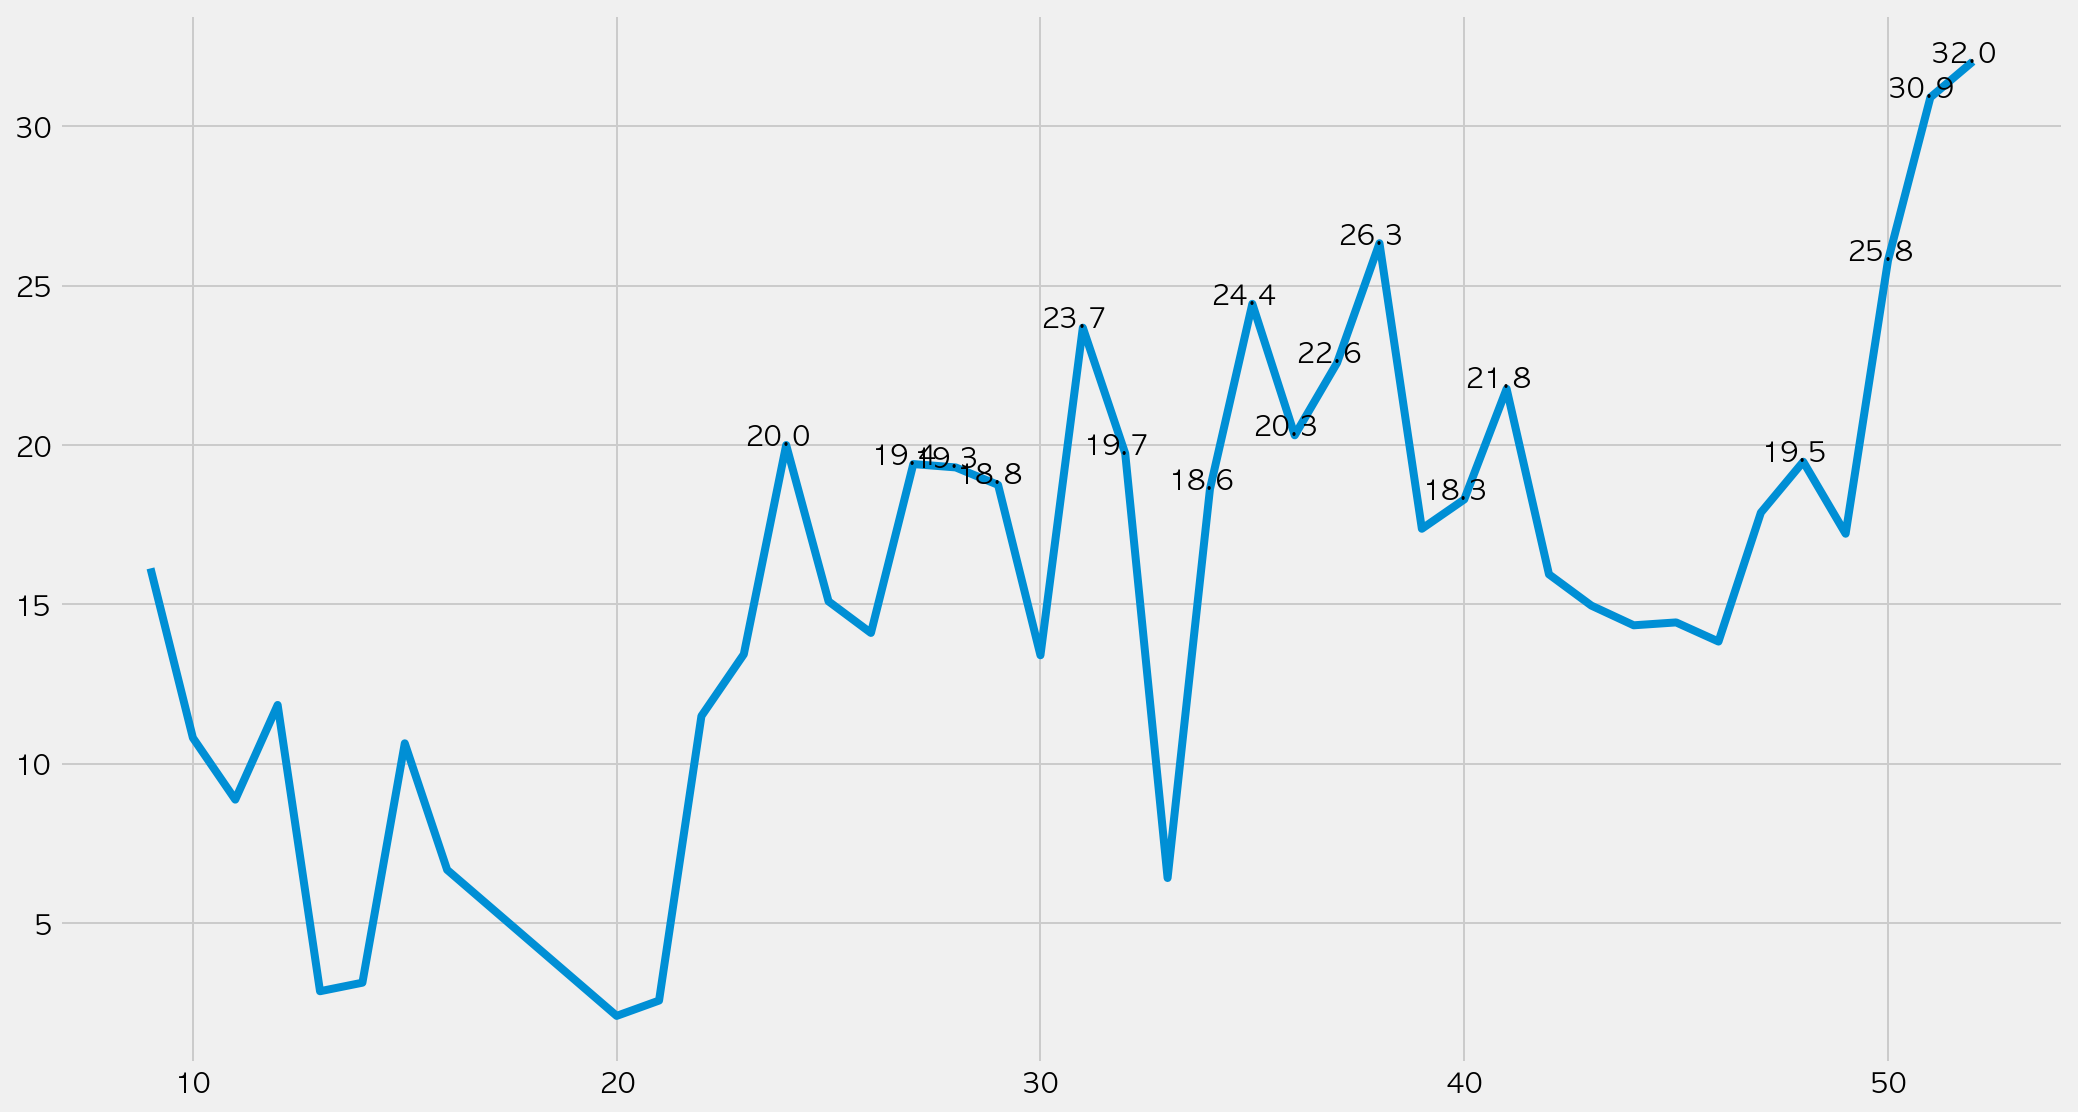

In [75]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [76]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')